# Electric Fields And Potentials

## Point Charge

In [5]:
import matplotlib.pyplot as plt  
import numpy as np 
from numba import njit


'''Particle'''
q = 1
particle_pos = np.array([0.0, 0.0, 0.0])

eps0 = 1

L = 1
N = 74

x, y, z = [np.linspace(-L, L, N) for i in range(3)]
rx, ry, rz = np.meshgrid(x, y, z)
Ex, Ey, Ez = np.zeros((3,N,N,N))


V = np.zeros((N,N,N))

@njit
def efield(r, particle_pos, q):
    R = r - particle_pos
    R_norm = np.linalg.norm(R)
    E = q/(4*np.pi*eps0) * (R/R_norm**3)
    
    return E

@njit
def epot(r, particle_pos, q):
    R_norm = np.linalg.norm(r-particle_pos)
    V = q/(4*np.pi*eps0*R_norm)
    return V

In [6]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Ex.flat[i], Ey.flat[i], Ez.flat[i] = efield(r, particle_pos, q)
    V.flat[i] = epot(r, particle_pos, q)

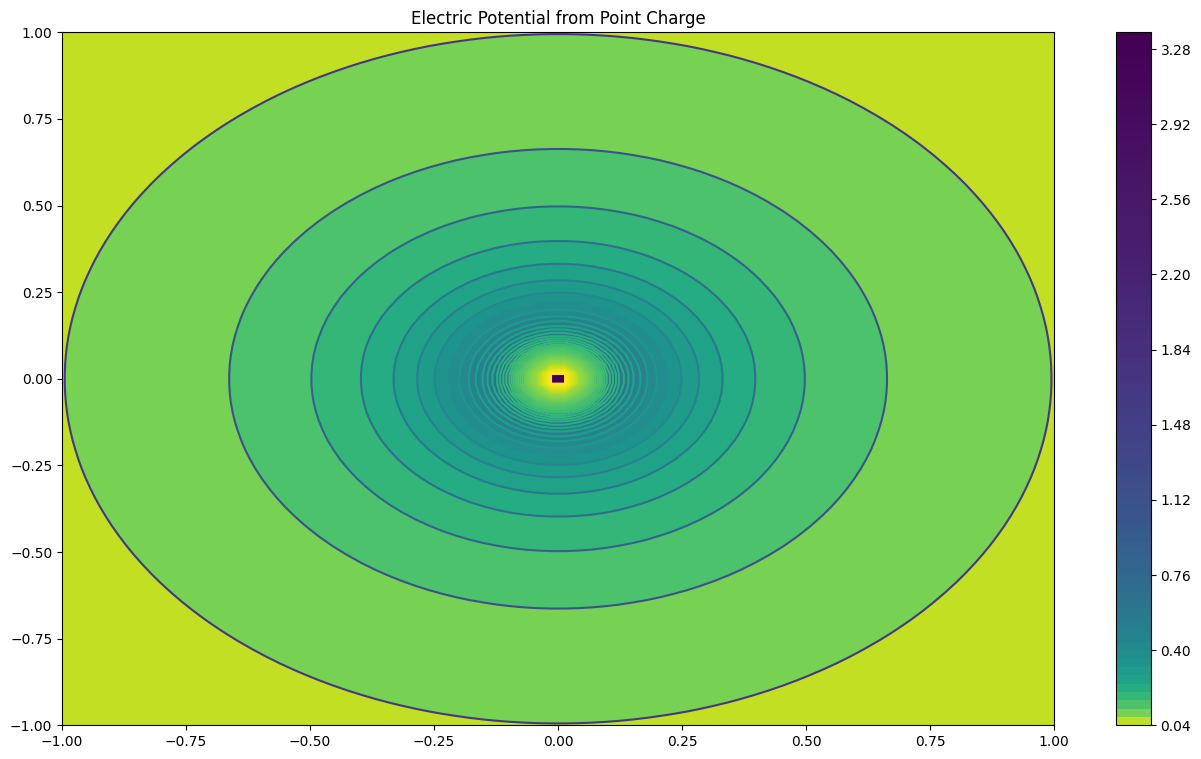

In [7]:
index = int(N/2)
cmap = 'viridis_r'
levels = 100
norm = 'log'
plt.figure(figsize=(16,9))
plt.contour(rx[:,:,index], ry[:,:,index], V[:,:,index], levels = levels, cmap = None, norm = norm)
plt.contourf(rx[:,:,index], ry[:,:,index], V[:,:,index], levels = levels, cmap = cmap, norm = norm)
plt.title('Electric Potential from Point Charge')
plt.colorbar()

In [8]:
N = 10

x, y, z = [np.linspace(-L, L, N) for i in range(3)]
rx, ry, rz = np.meshgrid(x, y, z)
Ex, Ey, Ez = np.zeros((3,N,N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Ex.flat[i], Ey.flat[i], Ez.flat[i] = efield(r, particle_pos, q)

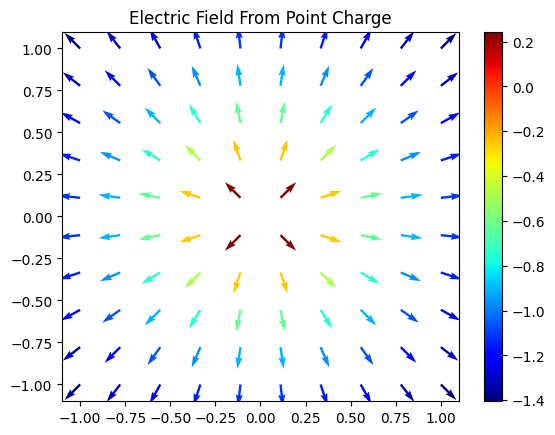

In [9]:
jndex = int(N/2)
Emag = np.sqrt(Ex[:,:,jndex]**2 + Ey[:,:,jndex]**2)
uEx = Ex[:,:,jndex] / Emag
uEy = Ey[:,:,jndex] / Emag
Ecolor = np.log10(Emag)
plt.quiver(rx[:,:,jndex], ry[:,:,jndex], uEx, uEy, Ecolor, cmap='jet')
plt.title('Electric Field From Point Charge')
plt.colorbar()

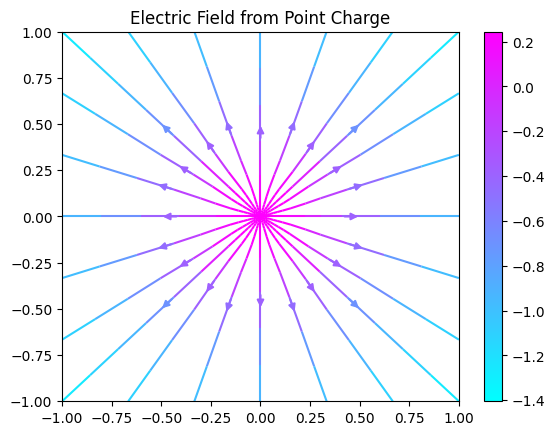

In [10]:
jndex = int(N/2)
Emag = np.sqrt(Ex[:,:,jndex]**2 + Ey[:,:,jndex]**2)
uEx = Ex[:,:,jndex] / Emag
uEy = Ey[:,:,jndex] / Emag
Ecolor = np.log10(Emag)
plt.streamplot(rx[:,:,jndex], ry[:,:,jndex], uEx, uEy, color = Ecolor, cmap='cool', broken_streamlines=False, density = .25)
plt.title('Electric Field from Point Charge')
plt.colorbar()

## Dipole

In [10]:
import matplotlib.pyplot as plt  
import numpy as np 
from numba import njit

q1 = 10
particle1_pos = np.array([1.0, 0.0, 0.0])
q2 = -10
particle2_pos = np.array([-1.0, 0.0, 0.0])


eps0 = 1

L = 1.5
N = 100

x, y, z = [np.linspace(-L, L, N) for i in range(3)]
rx, ry, rz = np.meshgrid(x, y, z)
Ex, Ey, Ez = np.zeros((3,N,N,N))

V = np.zeros((N,N,N))

In [11]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Ex.flat[i], Ey.flat[i], Ez.flat[i] = efield(r, particle1_pos, q1) + efield(r, particle2_pos, q2)
    V.flat[i] = epot(r, particle1_pos, q1) + epot(r, particle2_pos, q2)

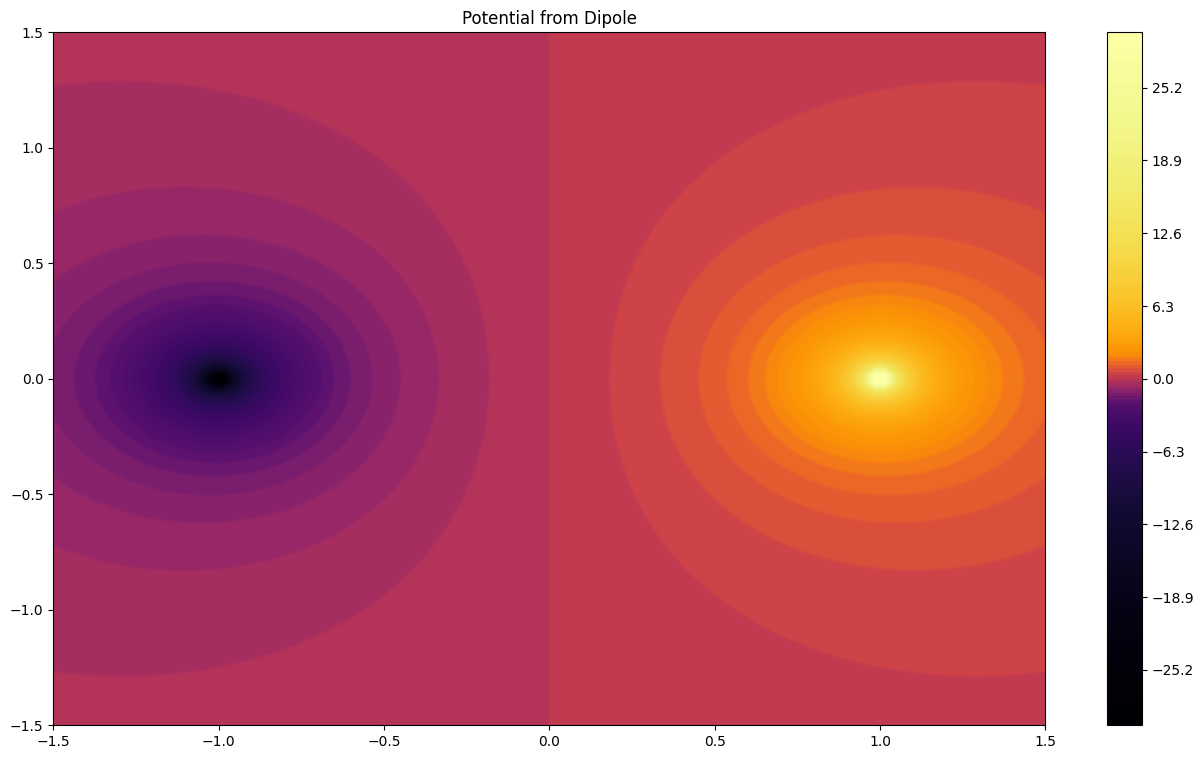

In [12]:
index = int(N/2)
plt.figure(figsize = (16,9))
cmap = 'inferno'
levels = 200
norm = 'symlog'
plt.contour(rx[:,:,index], ry[:,:,index],V[:,:,index], cmap = cmap, levels = levels, norm = norm)
plt.contourf(rx[:,:,index], ry[:,:,index],V[:,:,index], cmap = cmap, levels = levels, norm = norm)
plt.title('Potential from Dipole')
plt.colorbar()

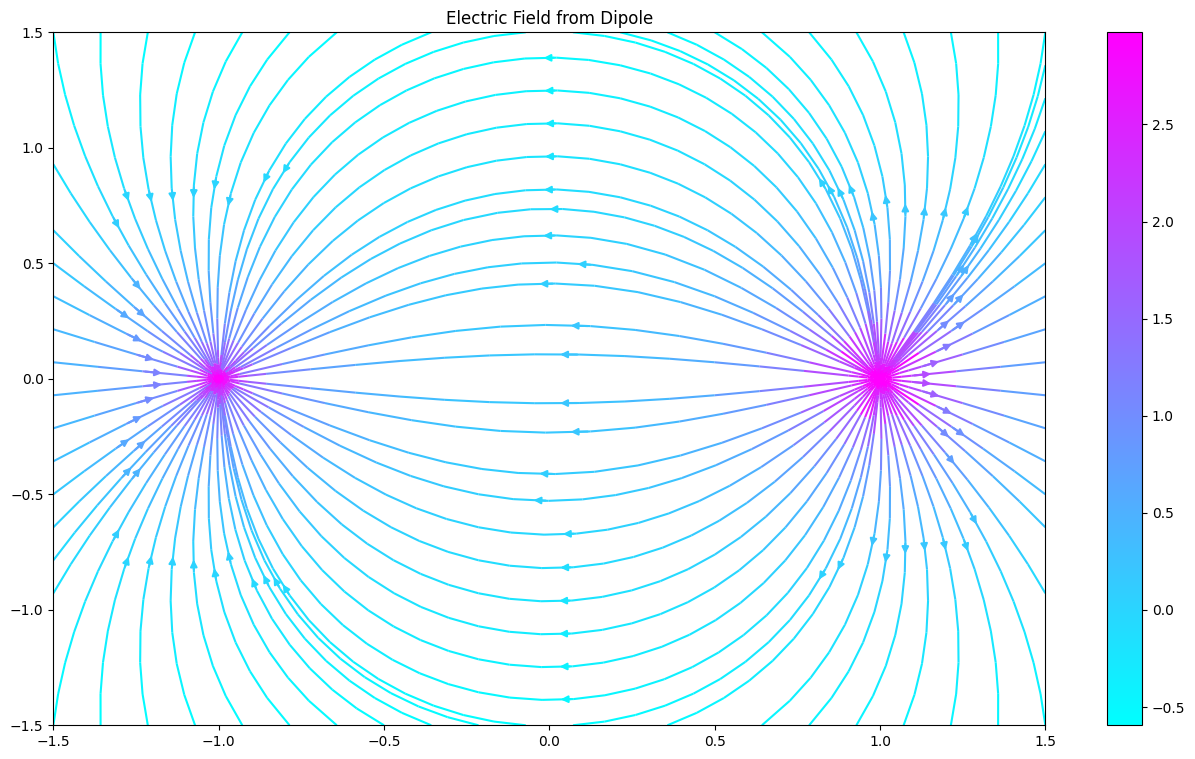

In [14]:
index = int(N/2)
Emag = np.sqrt(Ex[:,:,index]**2 + Ey[:,:,index]**2)
uEx = Ex[:,:,index]/Emag
uEy = Ey[:,:,index]/Emag
Ecolor = np.log10(Emag)
plt.figure(figsize=(16,9))
plt.streamplot(rx[:,:,index], ry[:,:,index], uEx, uEy, broken_streamlines=False, density = .75, color = Ecolor, cmap = 'cool')
plt.title('Electric Field from Dipole')
plt.colorbar()

## Line Charge

In [36]:
import numpy as np
import matplotlib.pyplot as plt  
from numba import njit

q = 2 
line_length = 10

N = 40
L = 10

x, y, z = [np.linspace(-L, L, N) for i in range(3)]
rx, ry, rz = np.meshgrid(x, y, z)
Ex, Ey, Ez = np.zeros((3,N,N,N))
V = np.zeros((N,N,N))

@njit
def efieldline(q, line_length, r, N):
    E = np.zeros(3)
    dl = line_length/N
    dq = q/N
    for i in range(N):
        r_q = np.array([-line_length/2 + i*dl ,0.0, 0.0])
        R = r - r_q
        R_norm = np.linalg.norm(R) 
        E += dq/(4*np.pi*eps0) * R/R_norm**3
        
    return E

@njit
def epotline(q, line_length, r, N):
    V = 0
    dl = line_length/N
    dq = q/N
    for i in range(N):
        r_q = np.array([-line_length/2 + i*dl, 0.0, 0.0])
        R_norm = np.linalg.norm(r-r_q)
        V += dq/(4*np.pi*eps0*R_norm)
    return V

In [37]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Ex.flat[i], Ey.flat[i], Ez.flat[i] = efieldline(q, line_length, r, 20)
    V.flat[i] = epotline(q, line_length, r, 20)

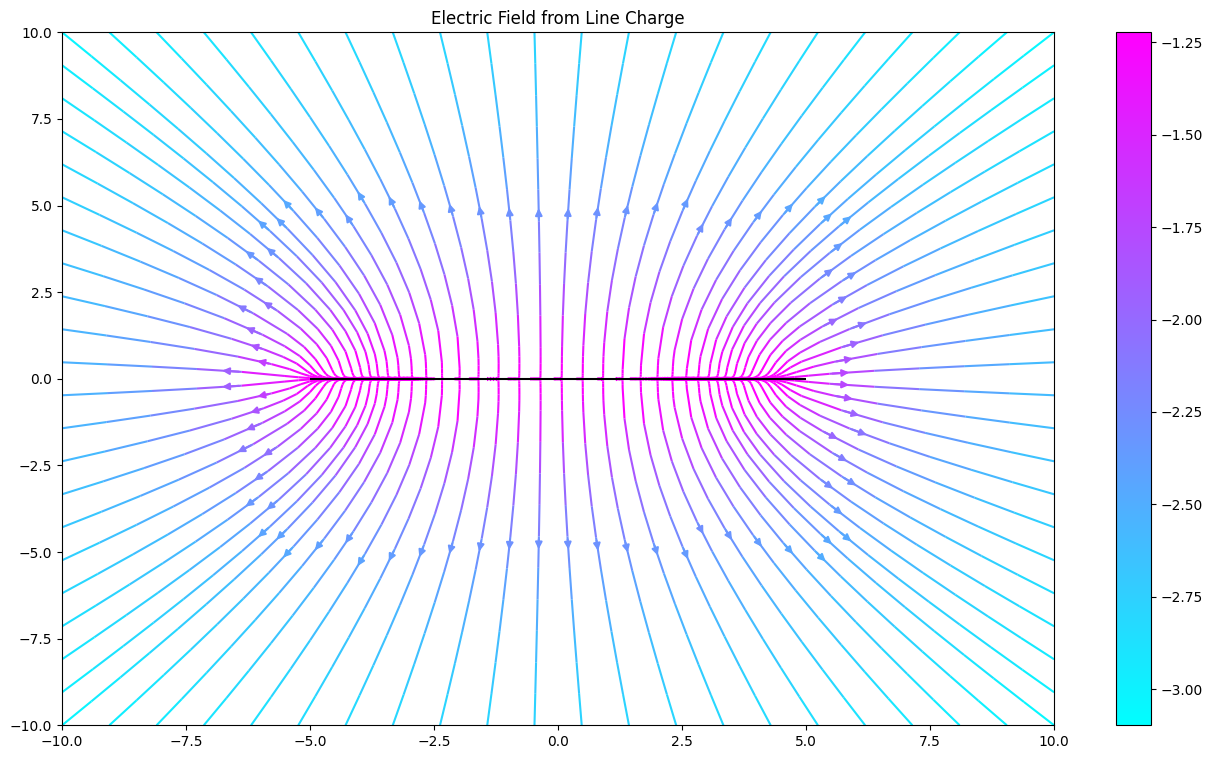

In [17]:
index = int(N/2)
Emag = np.sqrt(Ex[:,:,index]**2 + Ey[:,:,index]**2)
uEx = Ex[:,:,index]/Emag
uEy = Ey[:,:,index]/Emag
Ecolor = np.log10(Emag)

plt.figure(figsize=(16,9))
plt.streamplot(rx[:,:,index], ry[:,:,index], Ex[:,:,index], Ey[:,:,index], broken_streamlines=False, density = .75, color = Ecolor, cmap = 'cool')
plt.hlines(0, -line_length/2, line_length/2, color = 'black')
plt.title('Electric Field from Line Charge')
plt.colorbar()

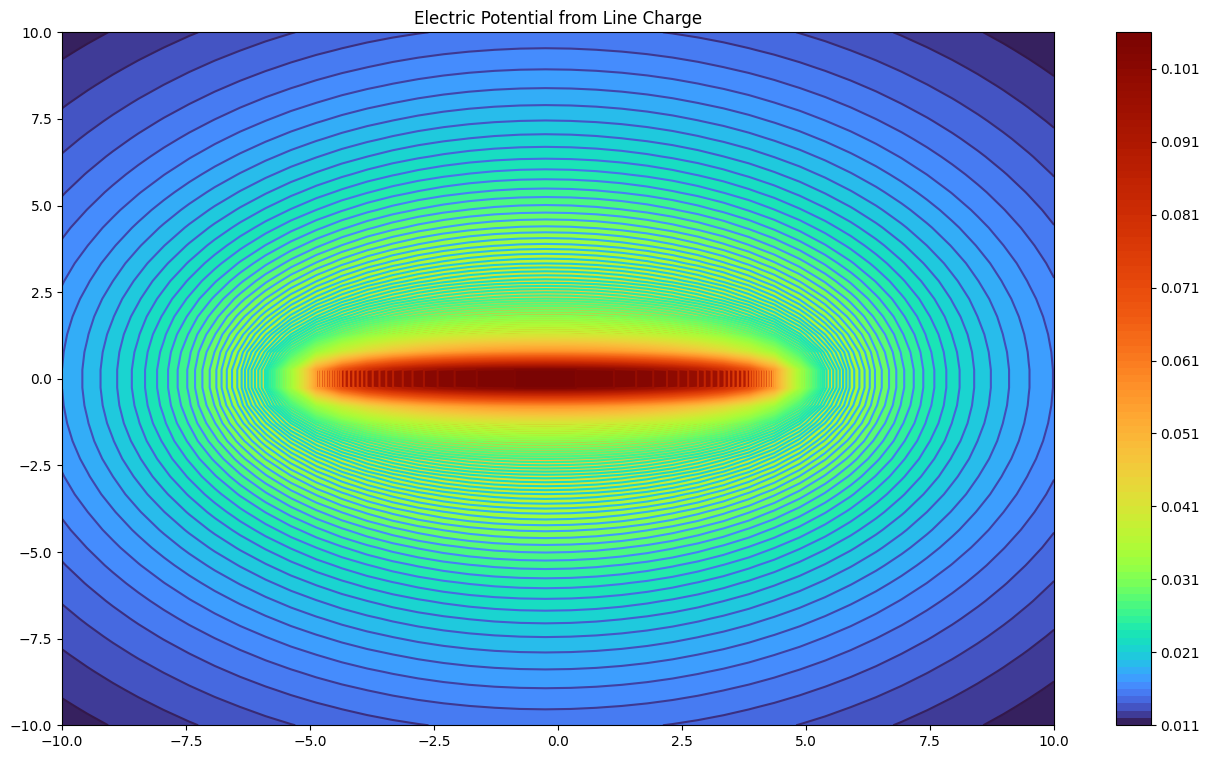

In [39]:
index = int(N/2)
plt.figure(figsize=(16,9))
cmap = 'turbo'
plt.contour(rx[:,:,index], ry[:,:,index],V[:,:,index], cmap = cmap, levels = 100)
plt.contourf(rx[:,:,index], ry[:,:,index],V[:,:,index], cmap = cmap, levels = 100, norm = 'log')
plt.title('Electric Potential from Line Charge')
plt.colorbar()

## Circular Charge

In [32]:
import numpy as np
import matplotlib.pyplot as plt  
from numba import njit

q = 5000
radius = 3

L = 4
N = 100

x,y = [np.linspace(-L, L, N) for i in range(2)]
rx,ry = np.meshgrid(x, y)
Ex, Ey = np.zeros((2,N,N))
V = np.zeros((N,N))

@njit
def efieldcircle(r, q, rad, N):
    E = np.zeros(3)
    
    if np.linalg.norm(r) < rad:
        return E
    
    else:
        dq = q/N
        for i in range(N):
            θ = 2*np.pi/N * i
            r_q = rad * np.array([np.cos(θ), np.sin(θ), 0.0])
            R = r - r_q
            R_norm = np.linalg.norm(R)
            E += dq/(4*np.pi*eps0) * R/R_norm**3
        
        return E

@njit
def epotcirle(r, q, rad, N):
    
    V = 0
    dq = q/N
    if np.linalg.norm(r) < radius:
        return q/(4*np.pi*8.854187817E-12*rad)
    
    else:
        for i in range(N):
            θ = 2*np.pi/N * i
            r_q = rad * np.array([np.cos(θ), np.sin(θ), 0.0])
            R = r - r_q
            R_norm = np.linalg.norm(R)
            V += dq/(4*np.pi*8.854187817E-12*R_norm)
            
    return V

In [33]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], 0.0]) 
    V.flat[i] = epotcirle(r, q, radius, 100)

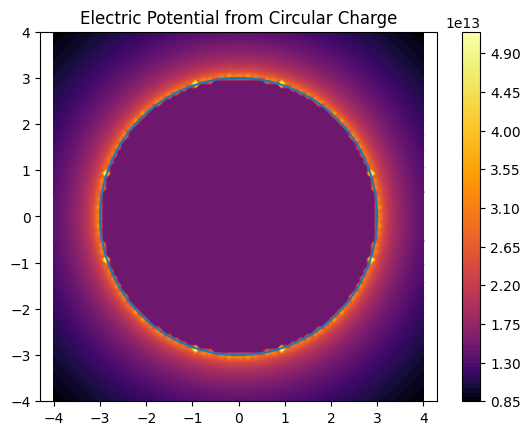

In [35]:
cmap = 'inferno'
norm = 'log'  
levels = 100
plt.contour(rx, ry, V, cmap = cmap, norm = norm, levels = levels)
plt.contourf(rx, ry, V, cmap = cmap, norm = norm, levels = levels)

t = np.linspace(0, 2*np.pi, 100)
c = radius * np.array([np.cos(t), np.sin(t)])
plt.plot(c[0], c[1])

plt.title('Electric Potential from Circular Charge')
plt.axis('equal')
plt.colorbar()

In [74]:
N = 100

x,y = [np.linspace(-L, L, N) for i in range(2)]
rx,ry = np.meshgrid(x, y)
Ex, Ey = np.zeros((2,N,N))
V = np.zeros((N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], 0.0]) 
    Ex.flat[i], Ey.flat[i], Ez = efieldcircle(r, q, radius, 100)

C:\Users\oskar\AppData\Local\Temp\ipykernel_53140\954714490.py:3: RuntimeWarning: invalid value encountered in true_divide
  uEx = Ex/Emag
C:\Users\oskar\AppData\Local\Temp\ipykernel_53140\954714490.py:4: RuntimeWarning: invalid value encountered in true_divide
  uEy = Ey/Emag
C:\Users\oskar\AppData\Local\Temp\ipykernel_53140\954714490.py:5: RuntimeWarning: divide by zero encountered in log10
  Ecolor = np.log10(Emag)


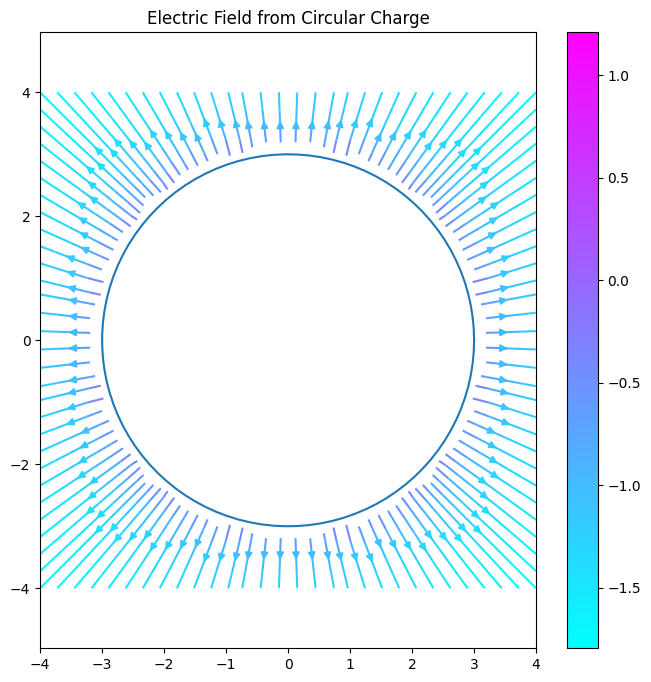

In [75]:
index = int(N/2)
Emag = np.sqrt(Ex**2 + Ey**2)
uEx = Ex/Emag
uEy = Ey/Emag
Ecolor = np.log10(Emag)

plt.figure(figsize=(8,8))
plt.streamplot(rx, ry, Ex, Ey, broken_streamlines=False, density = 1, cmap = 'cool', color = Ecolor)
t = np.linspace(0, 2*np.pi, 100)
c = radius * np.array([np.cos(t), np.sin(t)])
plt.plot(c[0], c[1])
plt.title('Electric Field from Circular Charge')
plt.axis('equal')
plt.colorbar()

In [82]:
N = 10

x,y = [np.linspace(-L, L, N) for i in range(2)]
rx,ry = np.meshgrid(x, y)
Ex, Ey = np.zeros((2,N,N))
V = np.zeros((N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], 0.0]) 
    Ex.flat[i], Ey.flat[i], Ez = efieldcircle(r, q, radius, 100)

C:\Users\oskar\AppData\Local\Temp\ipykernel_53140\2620045902.py:3: RuntimeWarning: invalid value encountered in true_divide
  uEx = Ex/Emag
C:\Users\oskar\AppData\Local\Temp\ipykernel_53140\2620045902.py:4: RuntimeWarning: invalid value encountered in true_divide
  uEy = Ey/Emag
C:\Users\oskar\AppData\Local\Temp\ipykernel_53140\2620045902.py:5: RuntimeWarning: divide by zero encountered in log10
  Ecolor = np.log10(Emag)


(-4.4, 4.4, -4.4, 4.4)

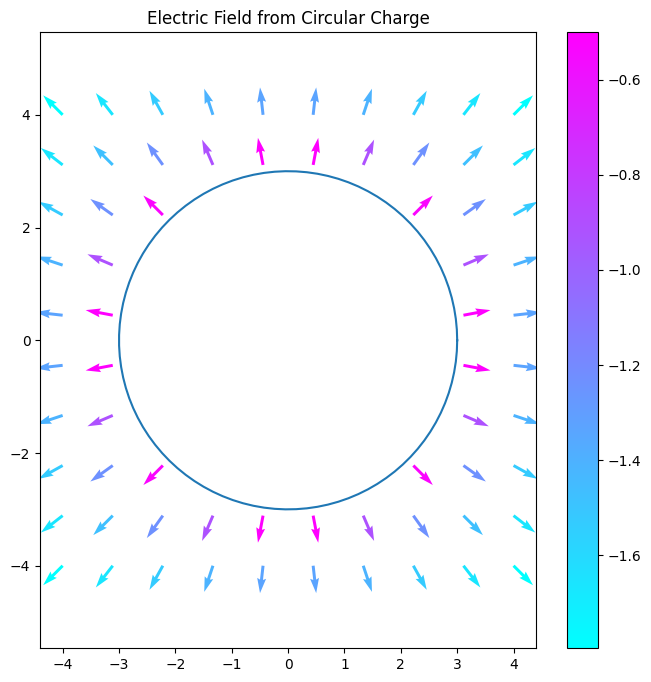

In [83]:
index = int(N/2)
Emag = np.sqrt(Ex**2 + Ey**2)
uEx = Ex/Emag
uEy = Ey/Emag  
Ecolor = np.log10(Emag)

plt.figure(figsize=(8,8))
plt.quiver(rx, ry, uEx, uEy, Ecolor, cmap = 'cool')
t = np.linspace(0, 2*np.pi, 100)
c = radius * np.array([np.cos(t), np.sin(t)])
plt.plot(c[0], c[1])
plt.title('Electric Field from Circular Charge')
plt.colorbar()
plt.axis('equal')